<center><img src="https://img.freepik.com/free-vector/bank-credit-finance-management-loan-agreement-signing-mortgage-money-credit_335657-3136.jpg?w=826&t=st=1653911422~exp=1653912022~hmac=0f4ff8a8a443e542f79b51f8a572e5d9cf2d39e6eca18b749419db75be96c4c9" width="700" height="400"></center>

<b><h2><center>Delinquent Analysis Case Study</center></h2></b>

## Problem Statement

### Context

DRS bank is facing challenging times. Their NPAs (Non-Performing Assets) has been on a rise recently and a large part of these are due to the loans given to individual customers(borrowers). Chief Risk Officer of the bank decides to put in a scientifically robust framework for approval of loans to individual customers to minimize the risk of loans converting into NPAs and initiates a project for the data science team at the bank. You, as a senior member of the team, are assigned this project.

### Objective
To identify the criteria to approve loans for an individual customer such that the likelihood of the loan delinquency is minimized and identify the factors that drive the behavior of loan delinquency.

### Dataset
* ID: Customer ID
* isDelinquent : indicates whether the customer is delinquent or not (1 => Yes, 0 => No)
* term: Loan term in months
* gender: Gender of the borrower
* age: Age of the borrower
* purpose: Purpose of Loan
* home_ownership: Status of borrower's home
* FICO: FICO (i.e. the bureau score) of the borrower

### Domain Information
* Transactor – A person who pays his due amount balance full and on time.
* Revolver – A person who pays the minimum due amount but keeps revolving his balance and does not pay the full amount.
* Delinquent - Delinquency means that you are behind on payments, a person who fails to pay even the minimum due amount.
* Defaulter – Once you are delinquent for a certain period your lender will declare you to be in the default stage.
* Risk Analytics – A wide domain in the financial and banking industry, basically analyzing the risk of the customer.


## Loading Libraries

In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

## Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Learning/ML-Quick Ref/All ML in One Notebook/Loan_Delinquent_Dataset.csv")

In [ ]:
# copying data to another varaible to avoid any changes to original data
loan = data.copy()

## Overview of the data

### View the first and last 5 rows of the dataset.

In [ ]:
loan.head()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,1,36 months,Female,House,Mortgage,>25,300-500
1,2,0,36 months,Female,House,Rent,20-25,>500
2,3,1,36 months,Female,House,Rent,>25,300-500
3,4,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,1,36 months,Female,House,Rent,>25,300-500


In [ ]:
loan.tail()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
11543,11544,0,60 months,Male,other,Mortgage,>25,300-500
11544,11545,1,36 months,Male,House,Rent,20-25,300-500
11545,11546,0,36 months,Female,Personal,Mortgage,20-25,>500
11546,11547,1,36 months,Female,House,Rent,20-25,300-500
11547,11548,1,36 months,Male,Personal,Mortgage,20-25,300-500


### Understand the shape of the dataset.

In [ ]:
loan.shape

(11548, 8)

* The dataset has 11548 rows and 8 columns of data

### Check the data types of the columns for the dataset.

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11548 non-null  int64 
 1   isDelinquent    11548 non-null  int64 
 2   term            11548 non-null  object
 3   gender          11548 non-null  object
 4   purpose         11548 non-null  object
 5   home_ownership  11548 non-null  object
 6   age             11548 non-null  object
 7   FICO            11548 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.9+ KB


**Observations -**
* isDelinquent is the dependent variable - type integer.
* All the dependent variables except for ID are object type.

### Summary of the dataset.

In [ ]:
loan.describe(include="all")

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
count,11548.000000,11548.000000,11548,11548,11548,11548,11548,11548
unique,NaN,NaN,2,2,7,3,2,2
top,NaN,NaN,36 months,Male,House,Mortgage,20-25,300-500
freq,NaN,NaN,10589,6555,6892,5461,5888,6370
mean,5774.500000,0.668601,NaN,NaN,NaN,NaN,NaN,NaN
std,3333.764789,0.470737,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2887.750000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,5774.500000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,8661.250000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


**Observations-**   

* Most of the loans are for a 36-month term loan.
* More males have applied for loans than females.
* Most loan applications are for house loans.
* Most customers have either mortgaged their houses.
* Mostly customers in the age group 20-25 have applied for a loan.
* Most customers have a FICO score between 300 and 500.

In [ ]:
# checking for unique values in ID column
loan["ID"].nunique()

11548

* Since all the values in ID column are unique we can drop it

In [ ]:
loan.drop(["ID"], axis=1, inplace=True)

### Check for missing values

In [ ]:
loan.isnull().sum()

,0
isDelinquent,0
term,0
gender,0
purpose,0
home_ownership,0
age,0
FICO,0


* There are no missing values in the dataset

## Exploratory Data Analysis (EDA)

**The below functions need to be defined to carry out the EDA.**

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate analysis

#### Observations on isDelinquent

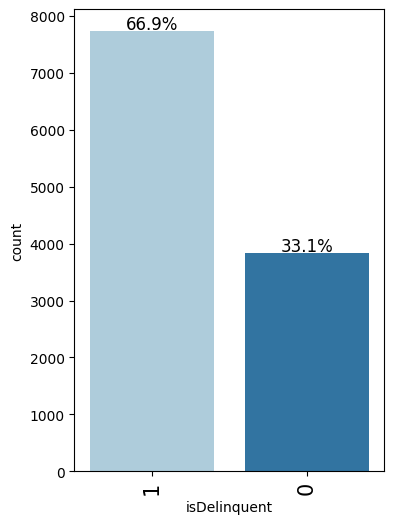

In [ ]:
labeled_barplot(loan, "isDelinquent", perc=True)

* 66.9% of the customers are delinquent

#### Observations on term

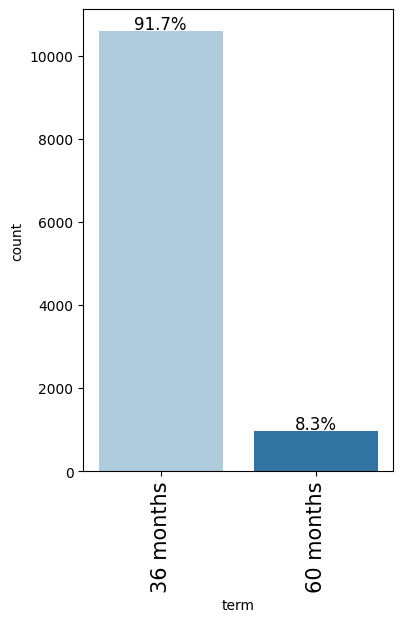

In [ ]:
labeled_barplot(loan, "term", perc=True)

* 91.7% of the loans are for a 36 month term.

#### Observations on gender

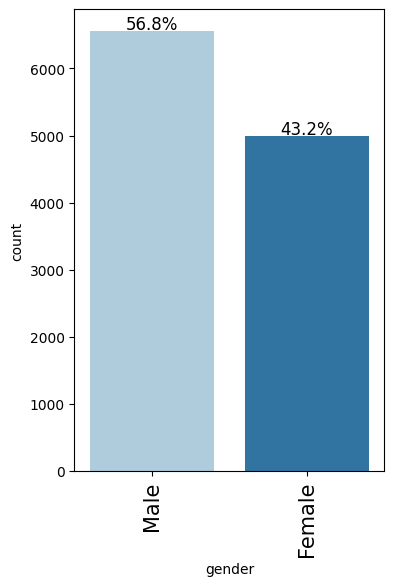

In [ ]:
labeled_barplot(loan, "gender", perc=True)

* There are more male applicants (56.8%) than female applicants (43.2%)

#### Observations on purpose

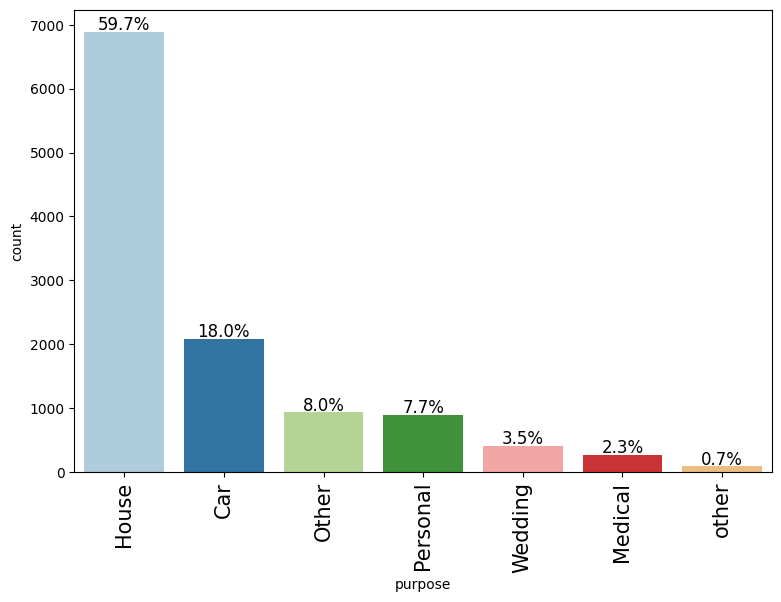

In [ ]:
labeled_barplot(loan, "purpose", perc=True)

* Most loan applications are for house loans (59.7%) followed by car loans (18%)
* There are 2 levels named 'other' and 'Other' under the purpose variable. Since we do not have any other information about these, we can merge these levels.

#### Observations on home_ownership

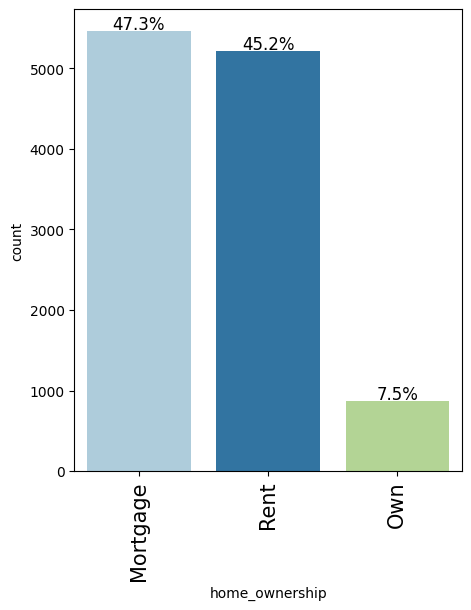

In [ ]:
labeled_barplot(loan, "home_ownership", perc=True)

* Very few applicants <10% own their house, Most customers have either mortgaged their houses or live on rent.

#### Observations on age

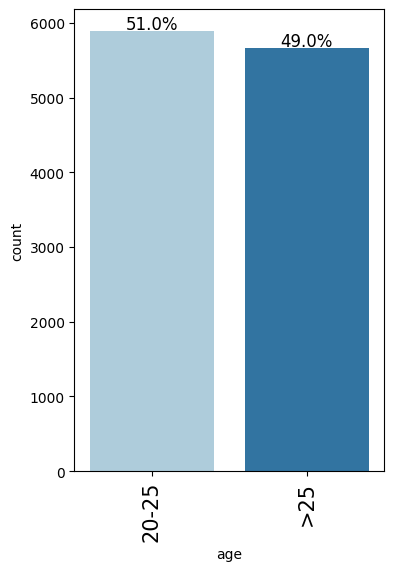

In [ ]:
labeled_barplot(loan, "age", perc=True)

* Almost an equal percentage of people aged 20-25 and >25 have applied for the loan.

#### Observations on FICO

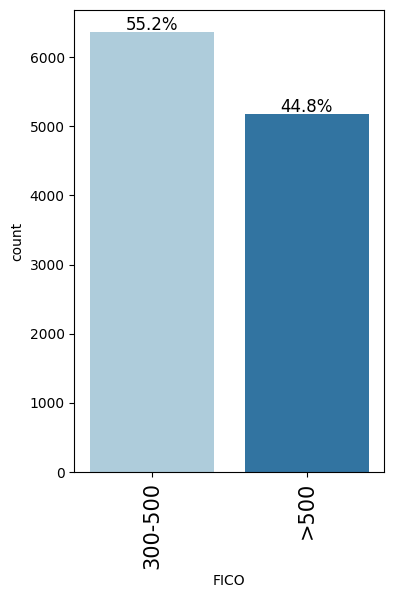

In [ ]:
labeled_barplot(loan, "FICO", perc=True)

* Most customers have a FICO score between 300 and 500 (55.2%) followed by a score of greater than 500 (44.8%)

### Data Cleaning

In [ ]:
loan["purpose"].unique()

array(['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical', 'other'],
      dtype=object)

#### We can merge the purpose -  'other' and 'Other' together

In [ ]:
loan["purpose"].replace("other", "Other", inplace=True)

In [ ]:
loan["purpose"].unique()

array(['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical'],
      dtype=object)

### Bivariate Analysis

#### term vs isDelinquent

isDelinquent     0     1    All
term                           
All           3827  7721  11548
36 months     3168  7421  10589
60 months      659   300    959
------------------------------------------------------------------------------------------------------------------------


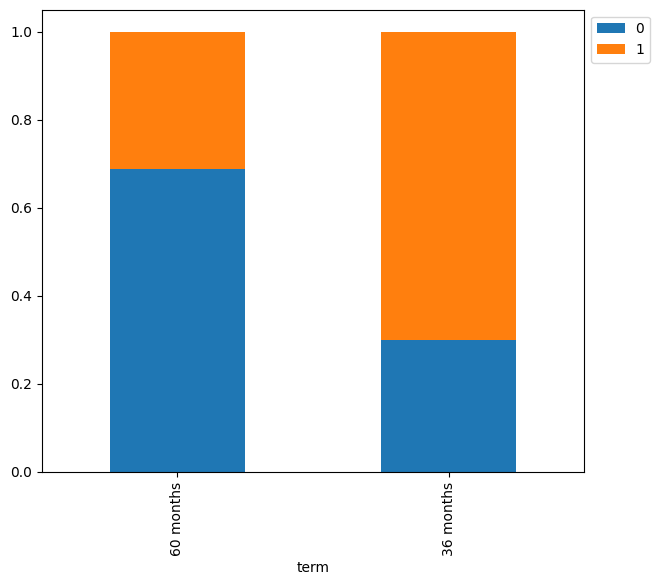

In [ ]:
stacked_barplot(loan, "term", "isDelinquent")

* Most loan delinquent customers have taken loan for 36 months.

#### gender vs isDelinquent

isDelinquent     0     1    All
gender                         
All           3827  7721  11548
Male          1977  4578   6555
Female        1850  3143   4993
------------------------------------------------------------------------------------------------------------------------


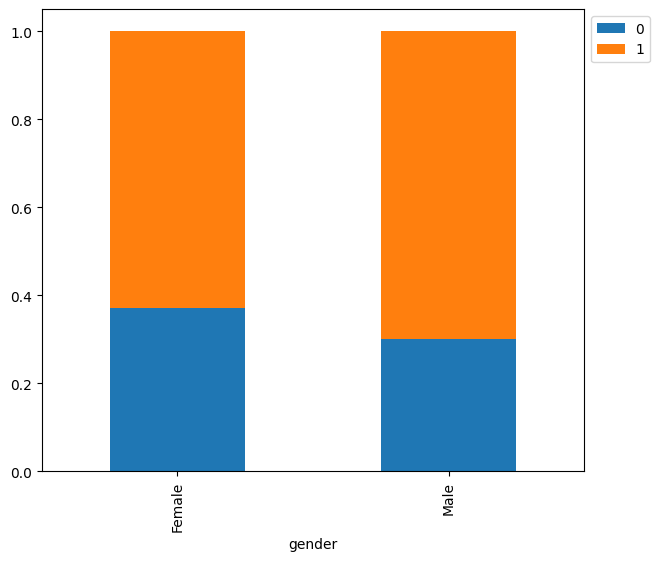

In [ ]:
stacked_barplot(loan, "gender", "isDelinquent")

* There's not much difference between male and female customers.

#### Purpose vs isDelinquent

isDelinquent     0     1    All
purpose                        
All           3827  7721  11548
House         2272  4620   6892
Car            678  1402   2080
Other          357   653   1010
Personal       274   618    892
Wedding        139   269    408
Medical        107   159    266
------------------------------------------------------------------------------------------------------------------------


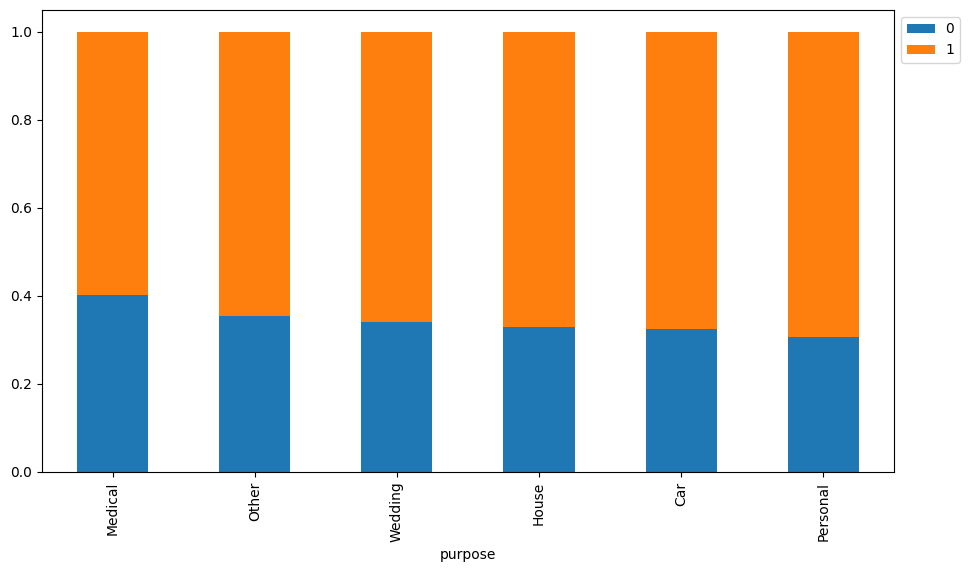

In [ ]:
stacked_barplot(loan, "purpose", "isDelinquent")

* Most loan delinquent customers are those who have applied for house loans followed by car and personal loans.

#### home_ownership vs isDelinquent

isDelinquent       0     1    All
home_ownership                   
All             3827  7721  11548
Mortgage        1831  3630   5461
Rent            1737  3479   5216
Own              259   612    871
------------------------------------------------------------------------------------------------------------------------


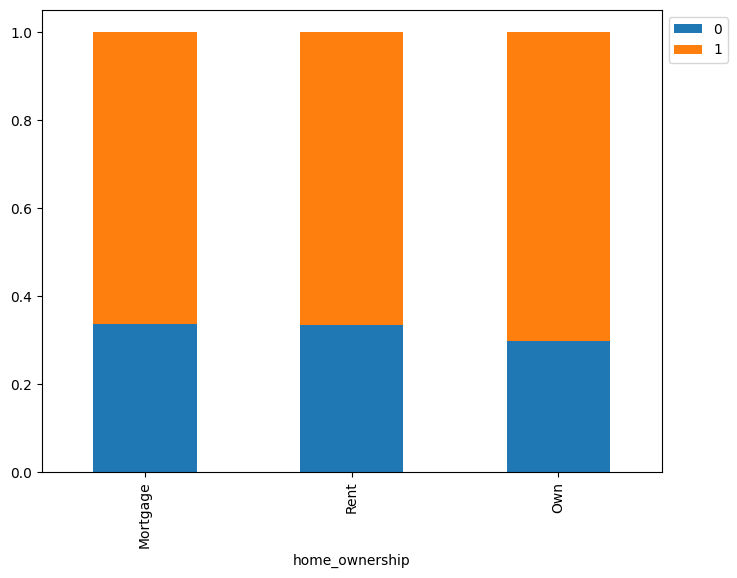

In [ ]:
stacked_barplot(loan, "home_ownership", "isDelinquent")

* Those customers who have their own house are less delinquent than the ones who live in a rented place or have mortgaged their home.

#### age vs isDelinquent

isDelinquent     0     1    All
age                            
All           3827  7721  11548
>25           1969  3691   5660
20-25         1858  4030   5888
------------------------------------------------------------------------------------------------------------------------


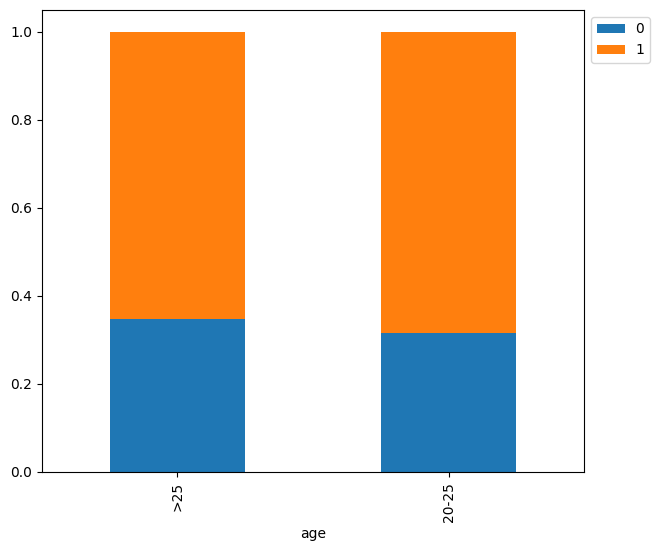

In [ ]:
stacked_barplot(loan, "age", "isDelinquent")

* Customers between 20-25 years of age are more delinquent.

#### FICO vs isDelinquent

isDelinquent     0     1    All
FICO                           
All           3827  7721  11548
>500          2886  2292   5178
300-500        941  5429   6370
------------------------------------------------------------------------------------------------------------------------


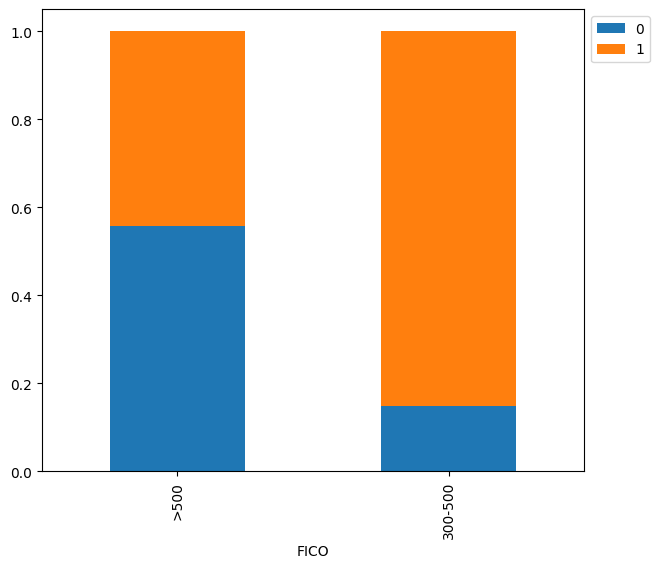

In [ ]:
stacked_barplot(loan, "FICO", "isDelinquent")

* If FICO score is >500 the chances of delinquency decrease quite a lot compared to when FICO score is between 300-500.

##### Key Observations -
* FICO score and term of loan application appear to be very strong indicators of delinquency.

* Other factors appear to be not very good indicators of delinquency. (We can use chi-square tests to determine statistical significance in the association between two categorical variables).

**We observed that a high FICO score means that the chances of delinquency are lower, let us see  if any of the other variables indicate higher a FICO score.**

#### home_ownership vs FICO

FICO            300-500  >500    All
home_ownership                      
All                6370  5178  11548
Mortgage           2857  2604   5461
Rent               3033  2183   5216
Own                 480   391    871
------------------------------------------------------------------------------------------------------------------------


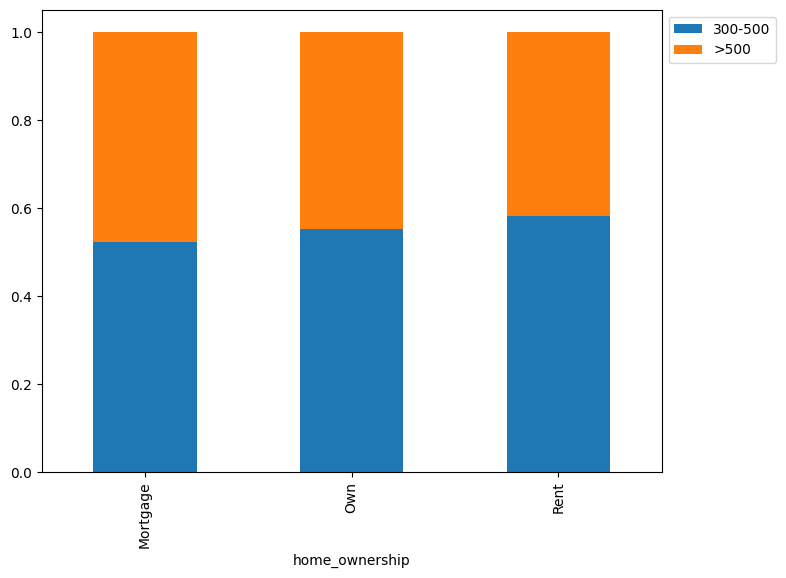

In [ ]:
stacked_barplot(loan, "home_ownership", "FICO")

#### age vs FICO

FICO   300-500  >500    All
age                        
All       6370  5178  11548
>25       2443  3217   5660
20-25     3927  1961   5888
------------------------------------------------------------------------------------------------------------------------


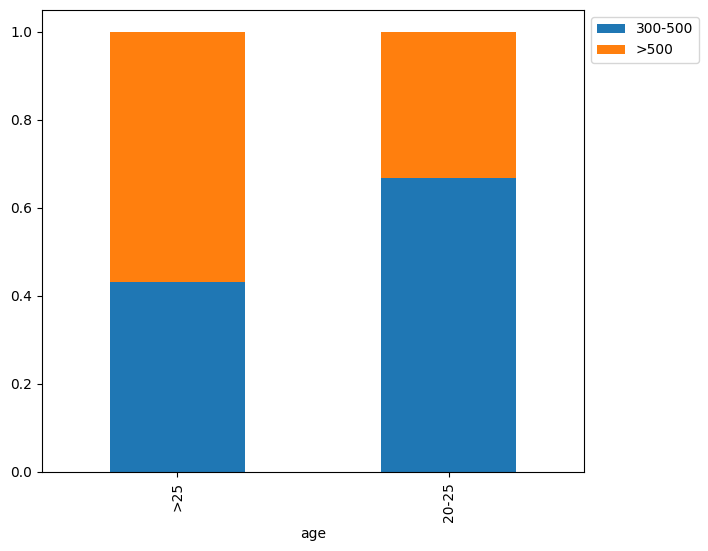

In [ ]:
stacked_barplot(loan, "age", "FICO")

#### gender vs FICO

FICO    300-500  >500    All
gender                      
All        6370  5178  11548
Male       3705  2850   6555
Female     2665  2328   4993
------------------------------------------------------------------------------------------------------------------------


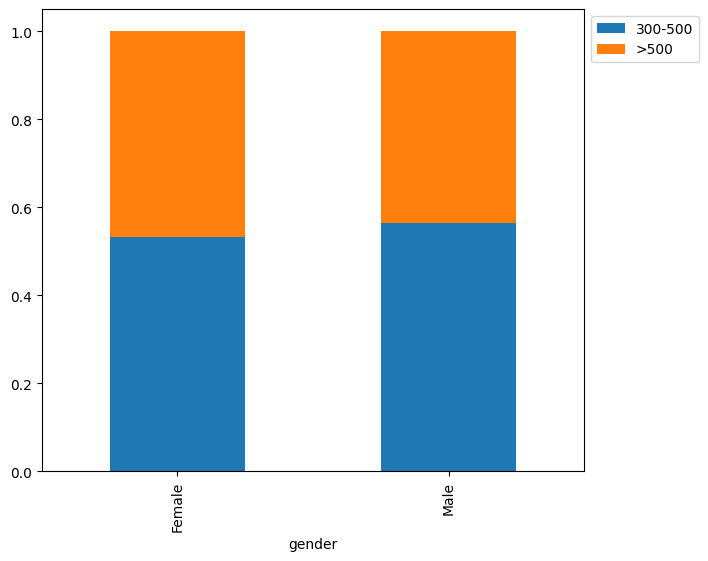

In [ ]:
stacked_barplot(loan, "gender", "FICO")

##### Key Observations

1. Home ownership and gender seem to have a slight impact on the FICO scores.
2. Age seems to have a much bigger impact on FICO scores.

**Let us check which of these differences are statistically significant.**

- The Chi-Square test is a statistical method to determine if two categorical variables have a significant correlation between them.
  
  - **Null Hypothesis -** There is no association between the two variables.      
  - **Alternate Hypothesis -** There is an association between two variables.

In [ ]:
crosstab = pd.crosstab(
    loan["FICO"], loan["home_ownership"]
)  # Contingency table of FICO and home_ownership attributes

Ho = "FICO score has no effect on home ownership"  # Stating the Null Hypothesis
Ha = "FICO score has an effect on home ownership"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

FICO score has an effect on home ownership as the p_value (0.0) < 0.05


In [ ]:
crosstab = pd.crosstab(
    loan["FICO"], loan["gender"]
)  # Contingency table of FICO and gender attributes

Ho = "FICO score has no effect on gender"  # Stating the Null Hypothesis
Ha = "FICO score has an effect on gender"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

FICO score has an effect on gender as the p_value (0.001) < 0.05


In [ ]:
crosstab = pd.crosstab(
    loan["FICO"], loan["age"]
)  # Contingency table of FICO and age attributes

Ho = "FICO score has no effect on age"  # Stating the Null Hypothesis
Ha = "FICO score has an effect on age"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

FICO score has an effect on age as the p_value (0.0) < 0.05


##### Key Observations-

* P-value for all tests < 0.01. Hence, all the differences that we see in the 3 plots are statistically significant.
* There is a correlation between FICO Score and house_ownership. People who have mortgaged their houses have higher FICO scores than people who own the house.
* There is a correlation between FICO Score and gender. More females have >500 FICO scores as compared to Males.
* There is a correlation between FICO Score and age. People >25 years of age have higher FICO scores as compared to people of age 20-25.

## Data Preprocessing

### Data Preparation for Modeling

In [ ]:
X = loan.drop(["isDelinquent"], axis=1)
y = loan["isDelinquent"]

In [ ]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True,dtype=int)
X.head()

,term_60 months,gender_Male,purpose_House,purpose_Medical,purpose_Other,purpose_Personal,purpose_Wedding,purpose_other,home_ownership_Own,home_ownership_Rent,age_>25,FICO_>500
0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,1,0


**Creating training and test sets.**

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6928, 12) (2310, 12) (2310, 12)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6928
Number of rows in validation data = 2310
Number of rows in test data = 2310


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
isDelinquent
1    0.668591
0    0.331409
Name: proportion, dtype: float64
Percentage of classes in test set:
isDelinquent
1    0.668831
0    0.331169
Name: proportion, dtype: float64
Percentage of classes in test set:
isDelinquent
1    0.668398
0    0.331602
Name: proportion, dtype: float64


### Model performance evaluation Criterion

### Model can make wrong predictions as:

1. Predicting a customer will not be behind on payments (Non-Delinquent) but in reality the customer would be behind on payments.

2. Predicting a customer will be behind on payments (Delinquent) but in reality the customer would not be behind on payments (Non-Delinquent).


### Which case is more important?

* If we predict a non-delinquent customer as a delinquent customer bank would lose an opportunity of providing loan to a potential customer.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The make_confusion_matrix function will be used to plot confusion matrix.

In [ ]:
scorer = metrics.make_scorer(metrics.recall_score)

**First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building Initial Models

**Let's start by building different models using KFold and cross_val_score and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [ ]:
%%time


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("SVM", SVC())),
models.append(("K-Nearest Neighbors", KNeighborsClassifier())),
models.append(("Naive Bayes", GaussianNB())),
models.append(("dtree", DecisionTreeClassifier(random_state=1))),
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("LightGBM",LGBMClassifier(objective='binary',random_state=42,verbose=-1)))


results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic Regression: 0.8745697237424889
SVM: 0.9030647645275757
K-Nearest Neighbors: 0.8970228401145384
Naive Bayes: 0.9427895088781246
dtree: 0.8985302923338947
Random forest: 0.9011218519994129
Bagging: 0.9004734378531272
GBM: 0.9030647645275757
Adaboost: 0.8855766878455549
Xgboost: 0.9015528854778998
LightGBM: 0.9019848509206643

Validation Performance:

Logistic Regression: 0.8919093851132686
SVM: 0.9145631067961165
K-Nearest Neighbors: 0.919093851132686
Naive Bayes: 0.9462783171521035
dtree: 0.9132686084142395
Random forest: 0.9145631067961165
Bagging: 0.913915857605178
GBM: 0.9145631067961165
Adaboost: 0.8983818770226537
Xgboost: 0.9158576051779935
LightGBM: 0.915210355987055
CPU times: user 16.9 s, sys: 259 ms, total: 17.1 s
Wall time: 19.2 s


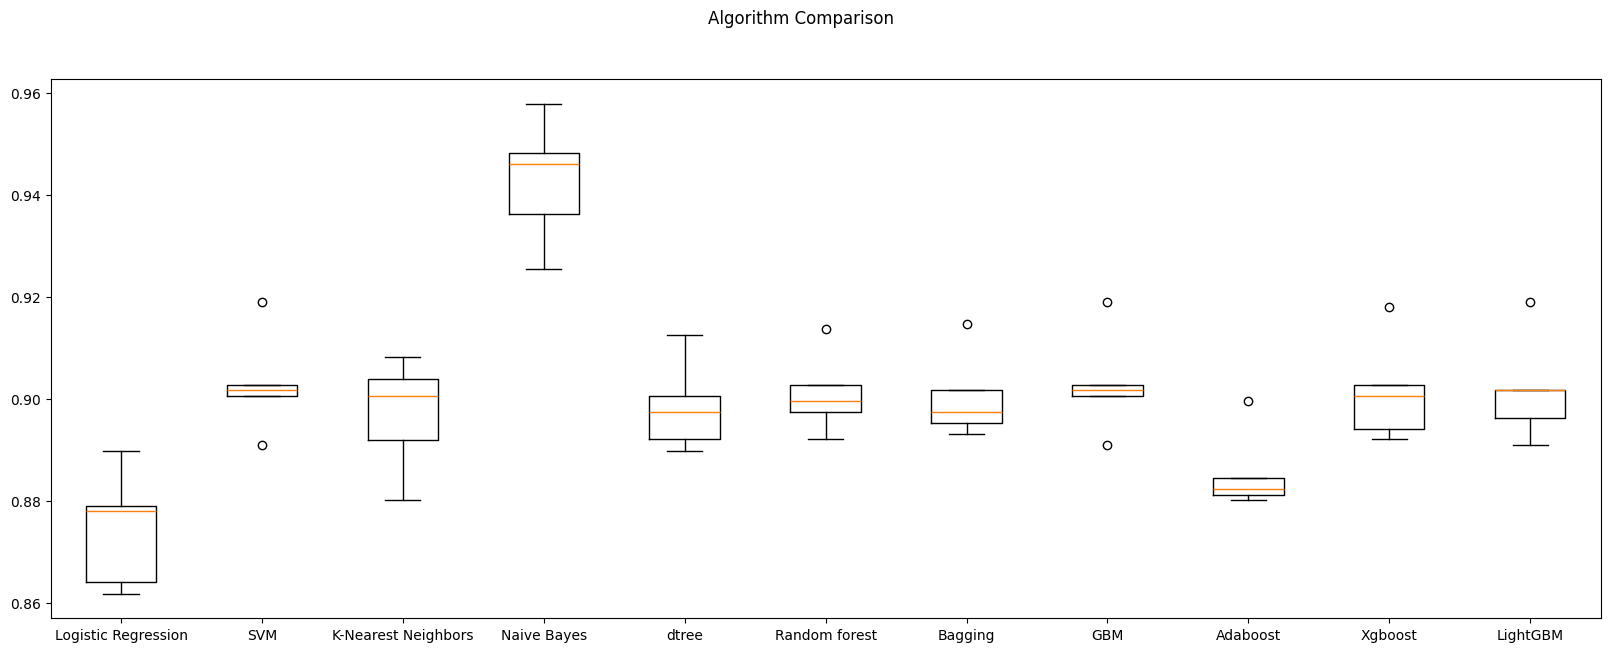

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(20, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- We can see that most of the models are performing well and giving genralized scores

- We will tune the Naive Bayes, SVM, Random Forest, XGBM and LightGBM with hyperparameters

## Hyper parameter Tuning

### Naive Bayes

Hyperparameter tuning for Naive Bayes, specifically the GaussianNB() classifier in scikit-learn, is less common and often less impactful compared to other algorithms like Support Vector Machines, Random Forests, or Gradient Boosting. This is because GaussianNB has very few hyperparameters that can be meaningfully tuned.

However, lets give it a try!!!

In [ ]:
# Choose the type of classifier.
gnb_tuned = GaussianNB()

param_grid = {'var_smoothing': np.logspace(-9, -1, num=100)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
grid_obj = GridSearchCV(gnb_tuned, param_grid, cv=5, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

# Set the clf to the best combination of parameters
gnb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gnb_tuned.fit(X_train, y_train)

Best parameters are {'var_smoothing': np.float64(0.06892612104349709)} with CV score=0.9494821773481423:


GaussianNB(var_smoothing=np.float64(0.06892612104349709))

#### Checking model performance on training set

In [ ]:
# Calculating metrics on train set
gnb_tuned_train_perf = model_performance_classification_sklearn(
    gnb_tuned, X_train, y_train)

gnb_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.704,0.951,0.707,0.811


#### Checking model performance on validation set

In [ ]:
# Calculating metrics on train set
gnb_tuned_val_perf = model_performance_classification_sklearn(
    gnb_tuned, X_val, y_val)

gnb_tuned_val_perf

,Accuracy,Recall,Precision,F1
0,0.700,0.955,0.703,0.810


### SVM

In [ ]:
# Choose the type of classifier.
svm_tuned = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale', 'auto'],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'degree': [2, 3]  # Only relevant for 'poly' kernel
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
grid_obj = RandomizedSearchCV(svm_tuned, param_grid, n_iter=20, cv=5, scoring=scorer, n_jobs=-1, verbose=2)
grid_obj = grid_obj.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

# Set the clf to the best combination of parameters
svm_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
svm_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters are {'kernel': 'poly', 'gamma': 0.01, 'degree': 3, 'C': 100} with CV score=1.0:


SVC(C=100, gamma=0.01, kernel='poly')

#### Checking model performance on training set

In [ ]:
# Calculating metrics on train set
svm_tuned_train_perf = model_performance_classification_sklearn(
    svm_tuned, X_train, y_train)

svm_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.685,1.000,0.680,0.809


#### Checking model performance on validation set

In [ ]:
# Calculating metrics on train set
svm_tuned_val_perf = model_performance_classification_sklearn(
    svm_tuned, X_val, y_val)

svm_tuned_val_perf

,Accuracy,Recall,Precision,F1
0,0.680,1.000,0.676,0.807


### KNN

In [ ]:
# Choose the type of classifier.
knn_tuned = KNeighborsClassifier()

param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],  # 1 for Manhattan, 2 for Euclidean
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
grid_obj = RandomizedSearchCV(knn_tuned, param_grid, n_iter=20, cv=5, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

# Set the clf to the best combination of parameters
knn_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
knn_tuned.fit(X_train, y_train)

Best parameters are {'weights': 'uniform', 'p': 2, 'n_neighbors': 27, 'metric': 'manhattan', 'algorithm': 'kd_tree'} with CV score=0.9056586541037881:


KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=27)

#### Checking model performance on training set

In [ ]:
# Calculating metrics on train set
knn_tuned_train_perf = model_performance_classification_sklearn(
    knn_tuned, X_train, y_train)

knn_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.851,0.907,0.876,0.891


#### Checking model performance on validation set

In [ ]:
# Calculating metrics on train set
knn_tuned_val_perf = model_performance_classification_sklearn(
    knn_tuned, X_val, y_val)

knn_tuned_val_perf

,Accuracy,Recall,Precision,F1
0,0.849,0.916,0.866,0.890


### Gradient Boosting (GBM)

In [ ]:
# Choose the type of classifier.
gbm_tuned = GradientBoostingClassifier(random_state=1)

param_grid={
    "n_estimators": np.arange(50,150,25),
    "learning_rate": [0.2,0.01,0.05],
    "subsample":[0.5,0.7,0.6],
    "max_features":[0.5,0.6,0.7]
    }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
grid_obj = RandomizedSearchCV(gbm_tuned, param_grid, n_iter=20, cv=5, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

# Set the clf to the best combination of parameters
gbm_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbm_tuned.fit(X_train, y_train)

Best parameters are {'subsample': 0.7, 'n_estimators': np.int64(75), 'max_features': 0.5, 'learning_rate': 0.01} with CV score=0.9455979832293029:


GradientBoostingClassifier(learning_rate=0.01, max_features=0.5,
                           n_estimators=np.int64(75), random_state=1,
                           subsample=0.7)

#### Checking model performance on training set

In [ ]:
# Calculating metrics on train set
gbm_tuned_train_perf = model_performance_classification_sklearn(
    gbm_tuned, X_train, y_train)

gbm_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.774,0.956,0.764,0.849


#### Checking model performance on validation set

In [ ]:
# Calculating metrics on train set
gbm_tuned_val_perf = model_performance_classification_sklearn(
    gbm_tuned, X_val, y_val)

gbm_tuned_val_perf

,Accuracy,Recall,Precision,F1
0,0.770,0.961,0.759,0.848


### XGBoost

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

param_grid = {
    'n_estimators': [250, 300],
    'scale_pos_weight': [5, 10],
    'learning_rate': [0.05, 0.1],
    'gamma': [0.1, 0.2],
    'subsample': [0.6,0.7],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
grid_obj = RandomizedSearchCV(xgb_tuned, param_distributions=param_grid,n_iter=10, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.05, 'gamma': 0.1} with CV score=0.9993525178179921:


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Checking model performance on training set

In [ ]:
# Calculating metrics on train set
xgb_tuned_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train)

xgb_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.728,1.000,0.711,0.831


#### Checking model performance on validation set

In [ ]:
# Calculating metrics on train set
xgb_tuned_val_perf = model_performance_classification_sklearn(
    xgb_tuned, X_val, y_val)

xgb_tuned_val_perf

,Accuracy,Recall,Precision,F1
0,0.716,0.997,0.703,0.824


### Light GBM

In [ ]:
# Choose the type of classifier.
lgbm_tuned = LGBMClassifier(objective='binary',random_state=42,verbose=-1)

# Grid of parameters to choose from
param_grid = {
    'num_leaves': [15, 31, 63],
    'max_depth': [3, 5, 7],
    'min_child_samples': [20, 30, 40],
    'subsample': [0.6, 0.8],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [200, 300]  # Add n_estimators to param_grid
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(lgbm_tuned,
                           param_grid,
                           cv=5,
                           n_iter=20,
                           scoring=scorer,  # Use the scorer
                           n_jobs=-1,
                           verbose=1)

grid_obj.fit(X_train, y_train)
print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

# Set the clf to the best combination of parameters
lgbm_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lgbm_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters are {'subsample': 0.6, 'num_leaves': 15, 'n_estimators': 200, 'min_child_samples': 30, 'max_depth': 3, 'learning_rate': 0.05} with CV score=0.903067560420409:


LGBMClassifier(learning_rate=0.05, max_depth=3, min_child_samples=30,
               n_estimators=200, num_leaves=15, objective='binary',
               random_state=42, subsample=0.6, verbose=-1)

#### Checking model performance on training set

In [ ]:
# Calculating metrics on train set
lgbm_tuned_train_perf = model_performance_classification_sklearn(
    lgbm_tuned, X_train, y_train)

lgbm_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.851,0.903,0.877,0.890


#### Checking model performance on validation set

In [ ]:
# Calculating metrics on train set
lgbm_tuned_val_perf = model_performance_classification_sklearn(
    lgbm_tuned, X_val, y_val)

lgbm_tuned_val_perf

,Accuracy,Recall,Precision,F1
0,0.853,0.916,0.871,0.893


## Comparison of Models and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gnb_tuned_train_perf.T,
        svm_tuned_train_perf.T,
        knn_tuned_train_perf.T,
        gbm_tuned_train_perf.T,
        xgb_tuned_train_perf.T,
        lgbm_tuned_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Naive Bayes",
    "SVM",
    "KNN",
    "Gradient Boosting",
    "XGBoost",
    "LightGBM",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Naive Bayes,SVM,KNN,Gradient Boosting,XGBoost,LightGBM
Accuracy,0.704,0.685,0.851,0.774,0.728,0.851
Recall,0.951,1.000,0.907,0.956,1.000,0.903
Precision,0.707,0.680,0.876,0.764,0.711,0.877
F1,0.811,0.809,0.891,0.849,0.831,0.890


In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        gnb_tuned_val_perf.T,
        svm_tuned_val_perf.T,
        knn_tuned_val_perf.T,
        gbm_tuned_val_perf.T,
        xgb_tuned_val_perf.T,
        lgbm_tuned_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Naive Bayes",
    "SVM",
    "KNN",
    "Gradient Boosting",
    "XGBoost",
    "LightGBM",
]
print("Validation set performance comparison:")
models_val_comp_df

Validation set performance comparison:


,Naive Bayes,SVM,KNN,Gradient Boosting,XGBoost,LightGBM
Accuracy,0.700,0.680,0.849,0.770,0.716,0.853
Recall,0.955,1.000,0.916,0.961,0.997,0.916
Precision,0.703,0.676,0.866,0.759,0.703,0.871
F1,0.810,0.807,0.890,0.848,0.824,0.893


## Conclusions and Recommendations

* FICO, term and gender (in that order) are the most important variables in determining if a borrower will get into a delinquent stage
* No borrower shall be given a loan if they are applying for a 36 month term loan and
have a FICO score in the range 300-500.
* Female borrowers with a FICO score greater than 500 should be our target customers.
* Criteria to approve loan according to decision tree model should depend on three main factors - FICO score, duration of loan and gender that is - If the FICO score is less than 500 and the duration of loan is less than 60 months then the customer will not be able to repay the loans. If the customer has greater than 500 FICO score and is a female higher chances that they will repay the loans.

* Importing the final model for deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(best_model, open("/content/drive/MyDrive/Learning/PGPDSBA/Week-2-Supervised Learning-Decision Tree/Loan_Delinquent_model.pkl", "wb"))

In [ ]:
X.head()

,term_60 months,gender_Male,purpose_House,purpose_Medical,purpose_Other,purpose_Personal,purpose_Wedding,home_ownership_Own,home_ownership_Rent,age_>25,FICO_>500
0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,0


In [ ]:
for columns in X.columns:
    print(columns)

term_60 months
gender_Male
purpose_House
purpose_Medical
purpose_Other
purpose_Personal
purpose_Wedding
home_ownership_Own
home_ownership_Rent
age_>25
FICO_>500
